# Multi-Free Field Analysis Example using DAPI

This example shows how to run OpenSeesMP in DesignSafe from a jupyter notebook using the DesignSafe API (dapi).

A set of four 1D profiles is analyzed using OpenSeesMP.

<img src = "multi-freeField.png"  height="400" width="400" align = "center">

# Setup DAPI and start OpenSeesMP job

In [ ]:
# Install required packages
!python -m pip install --upgrade numpy
!pip install -e ../../

### Setup job description

In [2]:
# Import DAPI and other required libraries
from dapi import DSClient
import os
import json
from datetime import date

In [3]:
# Initialize DesignSafe client
ds = DSClient()

Authentication successful.
DatabaseAccessor initialized. Connections will be created on first access.


In [10]:
ds_path = "/home/jupyter/MyData/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input"
print(f"DesignSafe path: {ds_path}")
input_uri = ds.files.translate_path_to_uri(ds_path)
print(f"Input URI: {input_uri}")

DesignSafe path: /home/jupyter/MyData/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input
Translated '/home/jupyter/MyData/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input' to 'tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input' using t.username
Input URI: tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input


In [8]:
# Job configuration parameters
jobname: str = "opensees-MP-multiMotion-dapi"
app_id: str = "opensees-mp-s3"
input_filename: str  = "Main_multiMotion.tcl"
control_exec_Dir: str  = "DS_input"  # Folder with files including input_filename
tacc_allocation: str  = "ASC25049"  # MUST USE YOUR OWN ALLOCATION !!
control_nodeCount: int  = 1
control_corespernode: int  = 16
max_job_minutes: int = 60

In [13]:
# Generate job request dictionary using app defaults
job_dict = ds.jobs.generate_request(
    app_id=app_id,
    input_dir_uri=input_uri,
    script_filename=input_filename,
    max_minutes=max_job_minutes,
    allocation=tacc_allocation,
)

Generating job request for app 'opensees-mp-s3'...
Using App Details: opensees-mp-s3 vlatest
Placing script 'Main_multiMotion.tcl' in appArgs: 'Main Script'
Adding allocation: ASC25049
Job request dictionary generated successfully.


In [14]:
# Customize job settings
job_dict["name"] = jobname
job_dict["nodeCount"] = control_nodeCount
job_dict["coresPerNode"] = control_corespernode

print("Generated job request:")
print(json.dumps(job_dict, indent=2, default=str))

Generated job request:
{
  "name": "opensees-MP-multiMotion-dapi",
  "appId": "opensees-mp-s3",
  "appVersion": "latest",
  "description": "Runs all the processors in parallel. Requires understanding of parallel processing and the capabilities to write parallel scripts.",
  "execSystemId": "stampede3",
  "archiveSystemId": "stampede3",
  "archiveOnAppError": true,
  "execSystemLogicalQueue": "skx",
  "nodeCount": 1,
  "coresPerNode": 16,
  "maxMinutes": 60,
  "memoryMB": 192000,
  "isMpi": false,
  "tags": [],
  "fileInputs": [
    {
      "name": "Input Directory",
      "sourceUrl": "tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input",
      "autoMountLocal": true,
      "targetPath": "inputDirectory"
    }
  ],
  "parameterSet": {
    "appArgs": [
      {
        "name": "Main Script",
        "arg": "Main_multiMotion.tcl"
      }
    ],
    "schedulerOptions": [
      {
        "name": "TACC Allocation",
        "arg": "-A AS

### Run job

In [15]:
# Submit job using dapi
submitted_job = ds.jobs.submit_request(job_dict)
print(f"Job launched with UUID: {submitted_job.uuid}")
print("Can also check in DesignSafe portal under - Workspace > Tools & Application > Job Status")


--- Submitting Tapis Job Request ---
{
  "name": "opensees-MP-multiMotion-dapi",
  "appId": "opensees-mp-s3",
  "appVersion": "latest",
  "description": "Runs all the processors in parallel. Requires understanding of parallel processing and the capabilities to write parallel scripts.",
  "execSystemId": "stampede3",
  "archiveSystemId": "stampede3",
  "archiveOnAppError": true,
  "execSystemLogicalQueue": "skx",
  "nodeCount": 1,
  "coresPerNode": 16,
  "maxMinutes": 60,
  "memoryMB": 192000,
  "isMpi": false,
  "tags": [],
  "fileInputs": [
    {
      "name": "Input Directory",
      "sourceUrl": "tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input",
      "autoMountLocal": true,
      "targetPath": "inputDirectory"
    }
  ],
  "parameterSet": {
    "appArgs": [
      {
        "name": "Main Script",
        "arg": "Main_multiMotion.tcl"
      }
    ],
    "schedulerOptions": [
      {
        "name": "TACC Allocation",
      

In [16]:
# Monitor job status using dapi
final_status = submitted_job.monitor(interval=15)
print(f"Job finished with status: {final_status}")

# Interpret job status
ds.jobs.interpret_status(final_status, submitted_job.uuid)

# Display runtime summary
submitted_job.print_runtime_summary(verbose=False)


Monitoring Job: 24938b27-854f-4a75-a687-fe21e8723b36-007
Job already in terminal state: FINISHED
Job finished with status: FINISHED
Job 24938b27-854f-4a75-a687-fe21e8723b36-007 completed successfully.

Runtime Summary
---------------
QUEUED  time: 00:03:57
RUNNING time: 00:01:01
TOTAL   time: 00:06:59
---------------


# Postprocess Results

### Identify job and archived location

In [17]:
# Get archive information using dapi
archive_uri = submitted_job.archive_uri
print(f"Archive URI: {archive_uri}")

# List archive contents
archive_files = ds.files.list(archive_uri)
print("\nArchive contents:")
for item in archive_files:
    print(f"- {item.name} ({item.type})")

Archive URI: tapis://stampede3/work2/05873/kks32/stampede3/tapis-jobs-archive/2025-06-05Z/opensees-MP-multiMotion-dapi-24938b27-854f-4a75-a687-fe21e8723b36-007
Listing files in system 'stampede3' at path 'work2/05873/kks32/stampede3/tapis-jobs-archive/2025-06-05Z/opensees-MP-multiMotion-dapi-24938b27-854f-4a75-a687-fe21e8723b36-007'...
Found 6 items.

Archive contents:
- inputDirectory (dir)
- opensees.zip (file)
- tapisjob.env (file)
- tapisjob.out (file)
- tapisjob.sh (file)
- tapisjob_app.sh (file)


### Go to archived folder

In [18]:
# Download archive files to local directory for postprocessing
import tempfile

# Create temporary directory for downloaded files
temp_dir = tempfile.mkdtemp(prefix="opensees_results_")
print(f"Downloading results to: {temp_dir}")

# Download the inputDirectory folder which contains results
input_dir_archive_uri = f"{archive_uri}/inputDirectory"
try:
    # List contents of inputDirectory in archive
    input_dir_files = ds.files.list(input_dir_archive_uri)
    print("\nFiles in inputDirectory:")
    for item in input_dir_files:
        print(f"- {item.name} ({item.type})")
    
    # Download key result files (you may need to adjust based on actual output)
    result_files = ["acc1.out", "acc2.out", "acc3.out", "acc4.out"]  # Example output files
    for filename in result_files:
        try:
            file_uri = f"{input_dir_archive_uri}/{filename}"
            local_path = os.path.join(temp_dir, filename)
            ds.files.download(file_uri, local_path)
            print(f"Downloaded: {filename}")
        except Exception as e:
            print(f"Could not download {filename}: {e}")
            
except Exception as e:
    print(f"Error accessing archive: {e}")

# Change to the temporary directory for postprocessing
os.chdir(temp_dir)
print(f"\nChanged to directory: {os.getcwd()}")
print("Local files:")
for f in os.listdir("."):
    print(f"- {f}")

Listing files in system 'stampede3' at path 'work2/05873/kks32/stampede3/tapis-jobs-archive/2025-06-05Z/opensees-MP-multiMotion-dapi-24938b27-854f-4a75-a687-fe21e8723b36-007/inputDirectory'...
Found 27 items.

Files in inputDirectory:
- .ipynb_checkpoints (dir)
- Main_multiMotion.tcl (file)
- motion1.vel (file)
- motion2.vel (file)
- plotAcc.py (file)
- ProfileA.tcl (file)
- ProfileA_accmotion1.out (file)
- ProfileA_accmotion2.out (file)
- ProfileA_Gstressmotion1.out (file)
- ProfileA_Gstressmotion2.out (file)
- ProfileB.tcl (file)
- ProfileB_accmotion1.out (file)
- ProfileB_accmotion2.out (file)
- ProfileB_Gstressmotion1.out (file)
- ProfileB_Gstressmotion2.out (file)
- ProfileC.tcl (file)
- ProfileC_accmotion1.out (file)
- ProfileC_accmotion2.out (file)
- ProfileC_Gstressmotion1.out (file)
- ProfileC_Gstressmotion2.out (file)
- ProfileD.tcl (file)
- ProfileD_accmotion1.out (file)
- ProfileD_accmotion2.out (file)
- ProfileD_Gstressmotion1.out (file)
- ProfileD_Gstressmotion2.out (file

### Import python libraries

In [20]:
!pip3 install matplotlib  # Install matplotlib for plotting

  Using cached contourpy-1.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 26.4 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.2-cp311-cp311-macosx_11_0_arm64.whl (254 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp311-cp311-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Plot acceleration response spectra

Plot acceleration response spectra on log-linear scale

plotAcc module not found. Creating basic plot instead.


/var/folders/6k/lmrc2s553fq0vn7c57__f37r0000gn/T/ipykernel_26086/1916283989.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


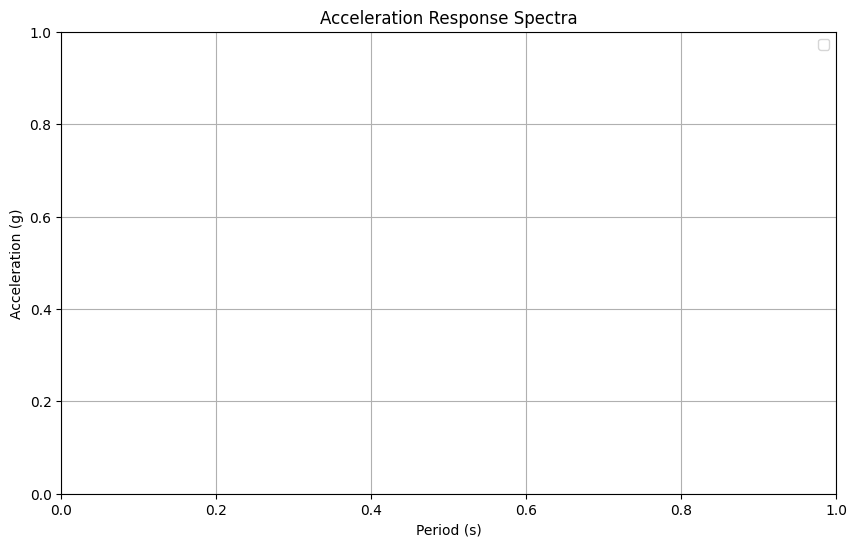

In [22]:
# Copy plotting functions from original directory
import sys
sys.path.append('../')  # Add parent directory to path

try:
    from plotAcc import plot_acc
    plot_acc()
except ImportError:
    print("plotAcc module not found. Creating basic plot instead.")
    
    # Basic plotting if plotAcc is not available
    plt.figure(figsize=(10, 6))
    
    # Check if result files exist and plot them
    for i, filename in enumerate(["acc1.out", "acc2.out", "acc3.out", "acc4.out"]):
        if os.path.exists(filename):
            try:
                data = np.loadtxt(filename)
                if len(data.shape) > 1 and data.shape[1] >= 2:
                    plt.semilogy(data[:, 0], data[:, 1], label=f"Profile {i+1}")
                else:
                    plt.semilogy(data, label=f"Profile {i+1}")
            except Exception as e:
                print(f"Error plotting {filename}: {e}")
    
    plt.xlabel("Period (s)")
    plt.ylabel("Acceleration (g)")
    plt.title("Acceleration Response Spectra")
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"Error in plotting: {e}")